# Image Classification with Convolutional Neural Networks

## Step 1: Load the data

In [41]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [19]:
basepath = '../data/01_raw/shipsnet/shipsnet/'

no_ship = glob(os.path.join(basepath, '0_*'))
ship = glob(os.path.join(basepath, '1_*'))

print(f'Number of ships: {len(ship)}')
print(f'Number of no ships: {len(no_ship)}')

Number of ships: 1000
Number of no ships: 3000


In [25]:
images = []
labels = []
for file in ship:
    image = Image.open(file)
    images.append(image)
    labels.append(1)

for file in no_ship:
    image = Image.open(file)
    images.append(image)
    labels.append(0)

images = np.array(images, dtype=np.int64)
labels = np.array(labels, dtype=np.int64)

## Step 2: Split the data into training and testing sets

In [42]:
from keras.utils import to_categorical

In [29]:
# Split the data into train (70%), validation (20%) and test (10%) datasets

from sklearn.model_selection import train_test_split

X_train, X_test_val, y_train, y_test_val = train_test_split(images, labels, test_size=0.3, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.33, random_state=42, shuffle=True)

In [32]:
y_train = to_categorical(y_train, 2)
y_val = to_categorical(y_val, 2)
y_test = to_categorical(y_test, 2)

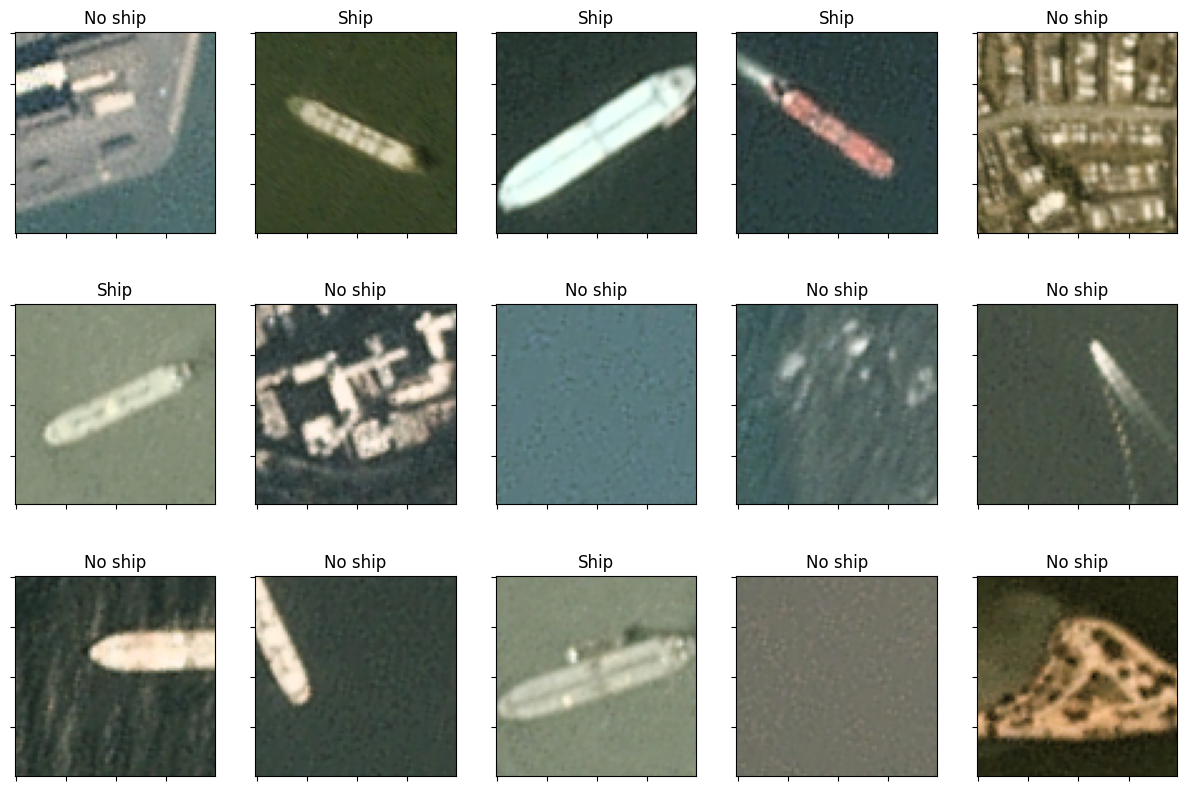

In [34]:
# Plot some sample images
n_rows = 3
n_cols = 5

plt.figure(figsize=(15, 10))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    index = random.randint(0, len(X_train) - 1)
    plt.imshow(X_train[index])
    plt.title(text_labels[np.argmax(y_train[index])])

## Step 3: Define the CNN

In [35]:
from keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    LeakyReLU,
    MaxPooling2D,
)
from keras.models import Sequential

In [37]:
# Define the Neural Network
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='linear', input_shape = (80, 80, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 80, 80, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 40, 40, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 256)            │             

 Total params: 2,046,850 (7.81 MB)

 Trainable params: 2,045,250 (7.80 MB)

 Non-trainable params: 1,600 (6.25 KB)

## Step 4: Train the model

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [39]:
# Compile and fit the NN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint("ship_detection.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=1, validation_data=(X_val, y_val), callbacks=[checkpoint])

Epoch 1/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8029 - loss: 0.4722
Epoch 1: val_accuracy improved from -inf to 0.94030, saving model to ship_detection.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.8033 - loss: 0.4717 - val_accuracy: 0.9403 - val_loss: 0.1555
Epoch 2/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9338 - loss: 0.2289
Epoch 2: val_accuracy did not improve from 0.94030
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.9338 - loss: 0.2287 - val_accuracy: 0.9391 - val_loss: 0.1673
Epoch 3/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9483 - loss: 0.1527
Epoch 3: val_accuracy improved from 0.94030 to 0.94527, saving model to ship_detection.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9483 - loss: 0.1526 - val_accuracy: 0.9453 - val_loss: 0.1344
Epoch 4/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9539 - loss: 0.1238
Epoch 4: val_accuracy improved from 0.94527 to 0.98134, savin

## Step 5: Evaluate the model

In [40]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9995 - loss: 0.0061
Test Loss: 0.017600402235984802
Test Accuracy: 0.997474730014801


## Step 6: Show accuracy and loss plots 

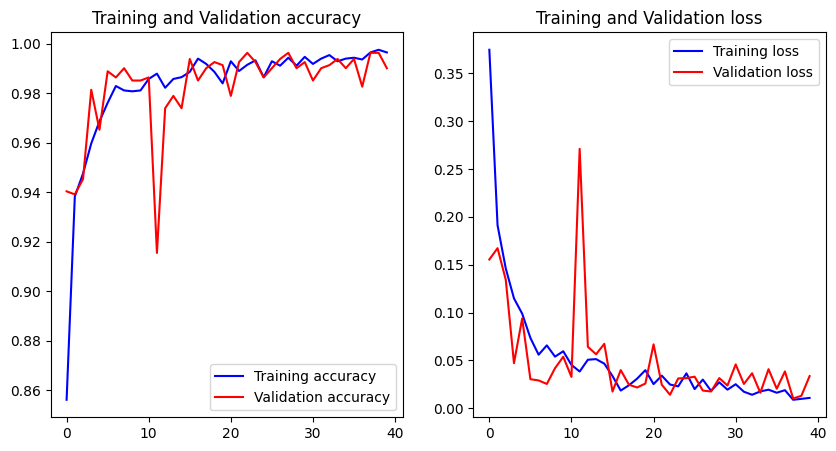

In [43]:
# Show accuracy and loss plots of the model
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.figure(figsize=(10,5))
ax = plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

ax = plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()